In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Load Data

In [2]:
data=pd.read_csv(r'C:\Users\jomondi\Desktop\Data Analytics\Python\Classification\Mining Process\Minning_Ore.csv',decimal=',',parse_dates=['date'],infer_datetime_format=True)

In [3]:
data.head()

,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,2017-03-10 01:00:00,55.2,16.98,3019.53,557.434,395.713,10.0664,1.74,249.214,253.235,...,250.884,457.396,432.962,424.954,443.558,502.255,446.370,523.344,66.91,1.31
1,2017-03-10 01:00:00,55.2,16.98,3024.41,563.965,397.383,10.0672,1.74,249.719,250.532,...,248.994,451.891,429.560,432.939,448.086,496.363,445.922,498.075,66.91,1.31
2,2017-03-10 01:00:00,55.2,16.98,3043.46,568.054,399.668,10.0680,1.74,249.741,247.874,...,248.071,451.240,468.927,434.610,449.688,484.411,447.826,458.567,66.91,1.31
3,2017-03-10 01:00:00,55.2,16.98,3047.36,568.665,397.939,10.0689,1.74,249.917,254.487,...,251.147,452.441,458.165,442.865,446.210,471.411,437.690,427.669,66.91,1.31
4,2017-03-10 01:00:00,55.2,16.98,3033.69,558.167,400.254,10.0697,1.74,250.203,252.136,...,248.928,452.441,452.900,450.523,453.670,462.598,443.682,425.679,66.91,1.31


With this data we are supposed to predict:

    1.Is it possible to predict % Silica Concentrate ever minute?
    2.How many steps (hours) ahead can we predict % Silica in Concentrate? 

## 2. Explore the data

In [4]:
data.shape

(737453, 24)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 737453 entries, 0 to 737452
Data columns (total 24 columns):
date                            737453 non-null datetime64[ns]
% Iron Feed                     737453 non-null float64
% Silica Feed                   737453 non-null float64
Starch Flow                     737453 non-null float64
Amina Flow                      737453 non-null float64
Ore Pulp Flow                   737453 non-null float64
Ore Pulp pH                     737453 non-null float64
Ore Pulp Density                737453 non-null float64
Flotation Column 01 Air Flow    737453 non-null float64
Flotation Column 02 Air Flow    737453 non-null float64
Flotation Column 03 Air Flow    737453 non-null float64
Flotation Column 04 Air Flow    737453 non-null float64
Flotation Column 05 Air Flow    737453 non-null float64
Flotation Column 06 Air Flow    737453 non-null float64
Flotation Column 07 Air Flow    737453 non-null float64
Flotation Column 01 Level       737453 non

In [6]:
data.describe()

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
count,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,...,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000
mean,56.294739,14.651716,2869.140569,488.144697,397.578372,9.767639,1.680380,280.151856,277.159965,281.082397,...,290.754856,520.244823,522.649555,531.352662,420.320973,425.251706,429.941018,421.021231,65.050068,2.326763
std,5.157744,6.807439,1215.203734,91.230534,9.699785,0.387007,0.069249,29.621288,30.149357,28.558268,...,28.670105,131.014924,128.165050,150.842164,91.794432,84.535822,89.862225,84.891491,1.118645,1.125554
min,42.740000,1.310000,0.002026,241.669000,376.249000,8.753340,1.519820,175.510000,175.156000,176.469000,...,185.962000,149.218000,210.752000,126.255000,162.201000,166.991000,155.841000,175.349000,62.050000,0.600000
25%,52.670000,8.940000,2076.320000,431.796000,394.264000,9.527360,1.647310,250.281000,250.457000,250.855000,...,256.302000,416.978000,441.883000,411.325000,356.679000,357.653000,358.497000,356.772000,64.370000,1.440000
50%,56.080000,13.850000,3018.430000,504.393000,399.249000,9.798100,1.697600,299.344000,296.223000,298.696000,...,299.011000,491.878000,495.956000,494.318000,411.974000,408.773000,424.664575,411.065000,65.210000,2.000000
75%,59.720000,19.600000,3727.730000,553.257000,402.968000,10.038000,1.728330,300.149000,300.690000,300.382000,...,301.904000,594.114000,595.464000,601.249000,485.549000,484.329000,492.684000,476.465000,65.860000,3.010000
max,65.780000,33.400000,6300.230000,739.538000,418.641000,10.808100,1.853250,373.871000,375.992000,364.346000,...,371.593000,862.274000,828.919000,886.822000,680.359000,675.644000,698.861000,659.902000,68.010000,5.530000


## 3. Data Wrangling

##### 1.Count Null

In [7]:
data.isna().sum()

date                            0
% Iron Feed                     0
% Silica Feed                   0
Starch Flow                     0
Amina Flow                      0
Ore Pulp Flow                   0
Ore Pulp pH                     0
Ore Pulp Density                0
Flotation Column 01 Air Flow    0
Flotation Column 02 Air Flow    0
Flotation Column 03 Air Flow    0
Flotation Column 04 Air Flow    0
Flotation Column 05 Air Flow    0
Flotation Column 06 Air Flow    0
Flotation Column 07 Air Flow    0
Flotation Column 01 Level       0
Flotation Column 02 Level       0
Flotation Column 03 Level       0
Flotation Column 04 Level       0
Flotation Column 05 Level       0
Flotation Column 06 Level       0
Flotation Column 07 Level       0
% Iron Concentrate              0
% Silica Concentrate            0
dtype: int64

Luckily  there are no Null values in the dataset

##### 2. Check if there are duplicates

In [8]:
df=data.drop_duplicates()

In [9]:
# Count duplicates

dup=data.shape[0]-df.shape[0]
dup

1171

In [10]:
df.shape

(736282, 24)

In [11]:
# Correlation matrix

corm=df.corr()
corm

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
% Iron Feed,1.000000,-0.971876,0.027869,-0.088128,0.161138,0.007687,-0.125657,-0.061945,-0.169021,-0.061783,...,-0.016156,0.029678,0.021090,0.015329,0.016646,0.023928,0.003890,0.026122,0.055844,-0.077179
% Silica Feed,-0.971876,1.000000,-0.016089,0.078553,-0.151053,0.008033,0.104287,0.091544,0.182428,0.083975,...,0.045203,-0.038294,-0.037010,-0.022672,-0.034167,-0.043942,-0.019580,-0.046484,-0.044403,0.072676
Starch Flow,0.027869,-0.016089,1.000000,0.254749,0.042962,0.263497,0.225990,0.191501,0.187065,0.183637,...,0.194944,-0.294159,-0.278174,-0.301586,-0.011927,-0.054836,-0.071543,-0.037721,0.070058,-0.066813
Amina Flow,-0.088128,0.078553,0.254749,1.000000,0.212597,0.124025,0.655352,0.111560,0.123346,0.102168,...,0.079674,-0.268700,-0.234701,-0.287252,-0.179816,-0.211502,-0.197984,-0.167756,-0.110742,0.156981
Ore Pulp Flow,0.161138,-0.151053,0.042962,0.212597,1.000000,0.117989,0.012733,-0.138482,-0.119294,-0.141355,...,-0.141197,-0.008920,-0.008476,-0.054637,-0.010723,0.001238,-0.016946,0.015902,0.082779,0.008497
Ore Pulp pH,0.007687,0.008033,0.263497,0.124025,0.117989,1.000000,0.115964,0.162613,0.144379,0.192966,...,0.174494,-0.166373,-0.154349,-0.140600,0.045292,0.011757,-0.075478,0.018084,0.192443,-0.147211
Ore Pulp Density,-0.125657,0.104287,0.225990,0.655352,0.012733,0.115964,1.000000,-0.004740,0.026546,-0.031353,...,-0.052175,-0.111556,-0.093037,-0.149803,-0.086387,-0.139891,-0.099982,-0.085164,0.015150,0.047002
Flotation Column 01 Air Flow,-0.061945,0.091544,0.191501,0.111560,-0.138482,0.162613,-0.004740,1.000000,0.848168,0.954496,...,0.646716,-0.442249,-0.426596,-0.372320,-0.063151,-0.092814,-0.119449,-0.111736,0.098089,-0.219076
Flotation Column 02 Air Flow,-0.169021,0.182428,0.187065,0.123346,-0.119294,0.144379,0.026546,0.848168,1.000000,0.860348,...,0.578528,-0.432858,-0.423850,-0.366171,-0.075872,-0.112315,-0.118141,-0.113640,0.058184,-0.167259
Flotation Column 03 Air Flow,-0.061783,0.083975,0.183637,0.102168,-0.141355,0.192966,-0.031353,0.954496,0.860348,1.000000,...,0.649380,-0.441468,-0.421729,-0.365273,-0.047825,-0.065020,-0.100848,-0.086232,0.099659,-0.218834


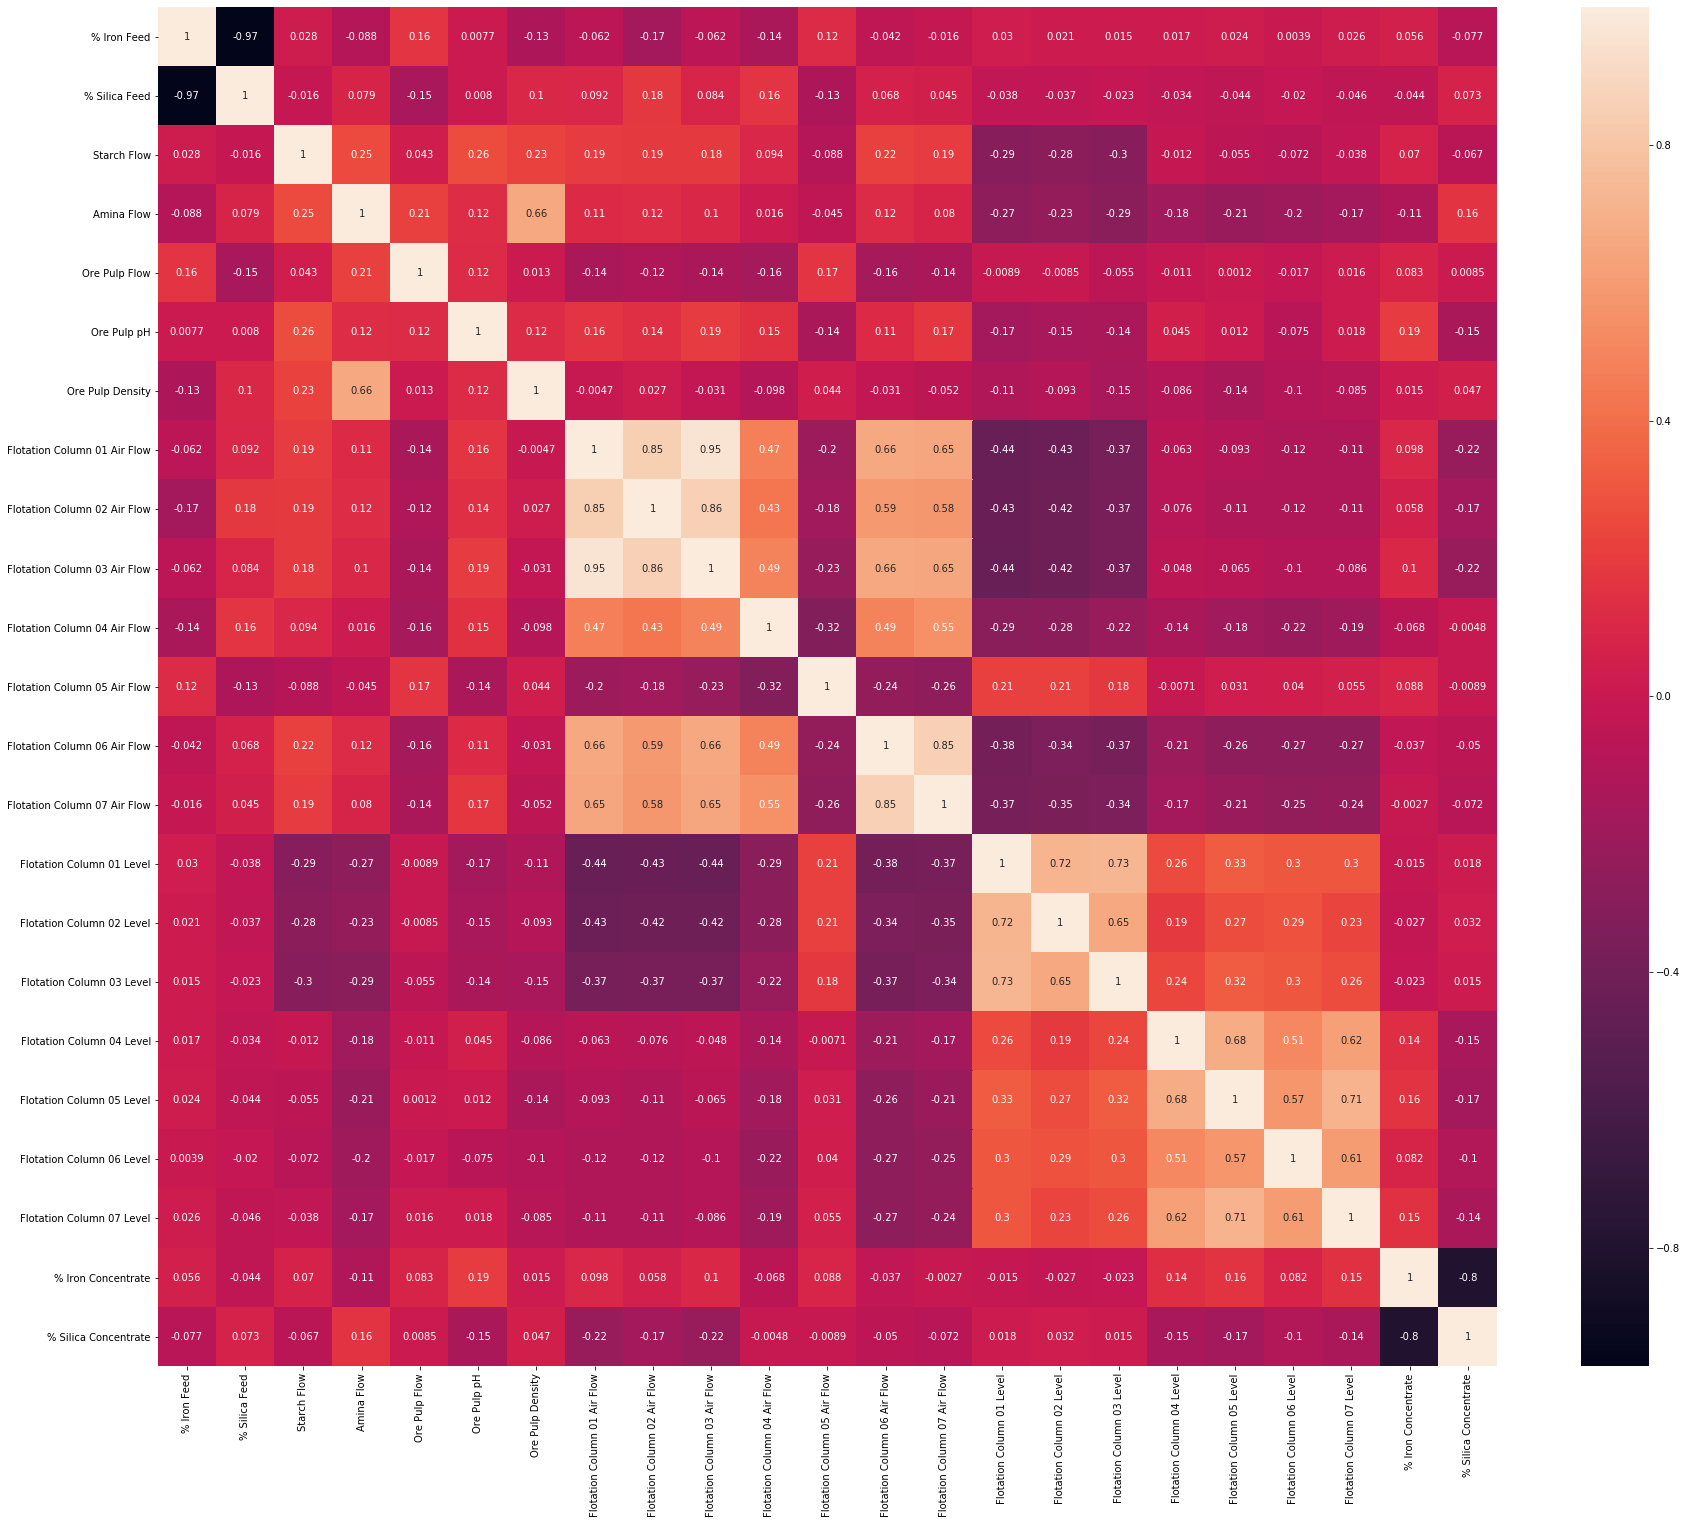

In [13]:
plt.figure(figsize=(30, 25))
p = sns.heatmap(df.corr(), annot=True)

In [15]:
df.columns

Index(['date', '% Iron Feed', '% Silica Feed', 'Starch Flow', 'Amina Flow',
       'Ore Pulp Flow', 'Ore Pulp pH', 'Ore Pulp Density',
       'Flotation Column 01 Air Flow', 'Flotation Column 02 Air Flow',
       'Flotation Column 03 Air Flow', 'Flotation Column 04 Air Flow',
       'Flotation Column 05 Air Flow', 'Flotation Column 06 Air Flow',
       'Flotation Column 07 Air Flow', 'Flotation Column 01 Level',
       'Flotation Column 02 Level', 'Flotation Column 03 Level',
       'Flotation Column 04 Level', 'Flotation Column 05 Level',
       'Flotation Column 06 Level', 'Flotation Column 07 Level',
       '% Iron Concentrate', '% Silica Concentrate'],
      dtype='object')

Drop attrubutes with high correlation i.e 'Flotation Column 01 Air Flow', 'Flotation Column 02 Air Flow','Flotation Column 03 Air Flow','date', '% Iron Concentrate'.

In [16]:
df2=df.drop(['Flotation Column 01 Air Flow', 'Flotation Column 02 Air Flow','Flotation Column 03 Air Flow','date', '% Iron Concentrate'],axis=1)

In [17]:
df2.head()

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 04 Air Flow,Flotation Column 05 Air Flow,Flotation Column 06 Air Flow,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Silica Concentrate
0,55.2,16.98,3019.53,557.434,395.713,10.0664,1.74,295.096,306.4,250.225,250.884,457.396,432.962,424.954,443.558,502.255,446.370,523.344,1.31
1,55.2,16.98,3024.41,563.965,397.383,10.0672,1.74,295.096,306.4,250.137,248.994,451.891,429.560,432.939,448.086,496.363,445.922,498.075,1.31
2,55.2,16.98,3043.46,568.054,399.668,10.0680,1.74,295.096,306.4,251.345,248.071,451.240,468.927,434.610,449.688,484.411,447.826,458.567,1.31
3,55.2,16.98,3047.36,568.665,397.939,10.0689,1.74,295.096,306.4,250.422,251.147,452.441,458.165,442.865,446.210,471.411,437.690,427.669,1.31
4,55.2,16.98,3033.69,558.167,400.254,10.0697,1.74,295.096,306.4,249.983,248.928,452.441,452.900,450.523,453.670,462.598,443.682,425.679,1.31


In [18]:
df2.shape

(736282, 19)

In [25]:
df.columns

Index(['date', '% Iron Feed', '% Silica Feed', 'Starch Flow', 'Amina Flow',
       'Ore Pulp Flow', 'Ore Pulp pH', 'Ore Pulp Density',
       'Flotation Column 01 Air Flow', 'Flotation Column 02 Air Flow',
       'Flotation Column 03 Air Flow', 'Flotation Column 04 Air Flow',
       'Flotation Column 05 Air Flow', 'Flotation Column 06 Air Flow',
       'Flotation Column 07 Air Flow', 'Flotation Column 01 Level',
       'Flotation Column 02 Level', 'Flotation Column 03 Level',
       'Flotation Column 04 Level', 'Flotation Column 05 Level',
       'Flotation Column 06 Level', 'Flotation Column 07 Level',
       '% Iron Concentrate', '% Silica Concentrate'],
      dtype='object')

## 4. Building Model


In [38]:
# Creating the X and Y variables

x=df2.drop(['% Silica Concentrate'], axis=1)
y=df2['% Silica Concentrate']

print('Dimension of x is: ', x.shape)
print('Dimension of y is: ', y.shape)

Dimension of x is:  (736282, 18)
Dimension of y is:  (736282,)


Normalize/ Scaling the data 

In [39]:


from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()


In [40]:
x_scaled = pd.DataFrame(min_max_scaler.fit_transform(x), columns=x.columns)

 Train/Test Split

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

### Using Linear Regression

Train the model

In [34]:
from sklearn.linear_model import LinearRegression

In [45]:
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [47]:
y_predict=reg.predict(x_test)
y_predict

array([2.99863261, 1.94467583, 2.74283718, ..., 2.27510009, 2.09868653,
       1.91997614])

In [55]:
# Determine coefficient of detemination (R2)

print('R2 is: ',reg.score(x_train,y_train).round(3))

R2 is:  0.101


Finding Mean Squared Error

In [48]:
from sklearn.metrics import mean_squared_error

In [49]:
error = mean_squared_error(y_test, y_predict)
error

1.135961962346891

In [53]:
# R-squared value for the model

from sklearn.metrics import r2_score

In [52]:
r2_score(y_test,y_predict).round(3)

0.102

In [100]:
# Root Mean squared error value for the model
rmse = np.sqrt((((y_predict) - (y_test))**2).mean())
rmse

1.0658151633125261

In [97]:
# Using MAPE 


def mean_absolute_percentage_error(y_test, y_predict): 
    y_test, y_predict = (np.array(y_test), np.array(y_predict))
    return np.mean(np.abs((y_test - y_predict) / y_test)) * 100

In [98]:
mean_absolute_percentage_error(y_test, y_predict)

41.974272830467555

### Using Stochastic Gradient Descent

In [57]:
from sklearn.linear_model import SGDRegressor

In [107]:
reg_sgd = SGDRegressor(max_iter=1500, tol=1e-3)

In [108]:
reg_sgd.fit(x_train,y_train)

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1500,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [69]:
sgd_predict=reg_sgd.predict(x_test)
sgd_predict

array([-5.44024664e+14, -8.64062021e+14, -6.24398442e+14, ...,
       -8.73186163e+14, -3.97553753e+14, -1.78279878e+14])

In [109]:
error1 = mean_squared_error(y_test, sgd_predict)
error1

5.8956209409531475e+29


### Linear Regression using statsmodel


In [75]:
import statsmodels.api as sm

import statsmodels.formula.api as smf

In [77]:
x1 = sm.add_constant(x_test)
x1.head()

C:\Users\jomondi\AppData\Local\Continuum\anaconda3\anaconda\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,const,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 04 Air Flow,Flotation Column 05 Air Flow,Flotation Column 06 Air Flow,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level
125925,1.0,55.17,14.35,1808.17,441.197,396.862000,9.48686,1.59560,303.027543,300.497378,250.290,256.01300,598.942,598.261,600.160,243.156,355.232,383.510,373.567
258592,1.0,64.03,6.26,3533.51,447.644,399.085000,10.25880,1.67029,299.888000,299.569000,300.798,299.92300,442.844,452.040,435.390,381.055,368.977,361.153,418.177
695481,1.0,48.46,24.90,2527.44,484.740,384.751000,8.95432,1.60299,299.235853,301.323536,359.955,353.83775,405.126,416.465,415.270,330.677,334.797,336.214,355.672
727423,1.0,56.09,15.79,3448.49,556.811,413.453774,9.37545,1.64578,302.660443,304.164656,344.921,324.69400,391.169,526.111,395.834,347.156,352.536,342.797,334.247
443007,1.0,55.78,12.85,3283.95,440.219,396.885000,9.82755,1.55608,299.774000,300.658000,306.799,307.70000,402.207,400.213,385.540,366.088,388.954,392.092,428.830


In [78]:
print(y.head())

0    1.31
1    1.31
2    1.31
3    1.31
4    1.31
Name: % Silica Concentrate, dtype: float64


In [85]:
results = reg.fit(x,y)

In [102]:
print(results.summary())

AttributeError: 'LinearRegression' object has no attribute 'summary'